In [67]:
# data processing

import pandas as pd
import numpy as np
import os

data_path = './dataset'

stocks = ['amzn','bac','fis','goog','jpm','kkr']#'meta','tesla'
suffix = '_train_02142021_02142023.csv'



In [68]:
# indx = 0
data_pd = []
time_pd = []
for indx in range(len(stocks)):
    data_file = os.path.join(data_path, stocks[indx] + suffix)

    tmp_pd = pd.read_csv(data_file)
    data_pd.append(list(tmp_pd['Open']))
time_pd.append(tmp_pd['Date'])

In [72]:
time_pd = []

# time_pd.append(tmp_pd['Date'])
time_pd = list(range(24))
len(data_pd[0])
len(time_pd)
# data_pd[0]

24

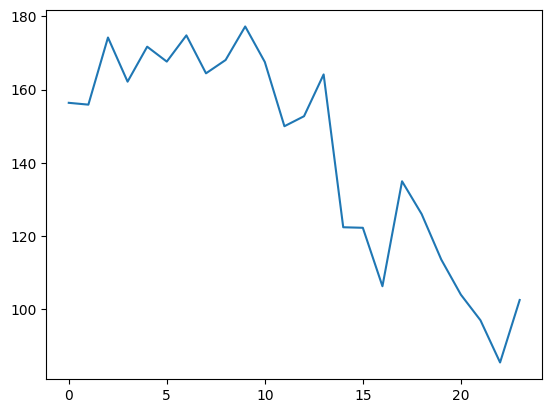

In [73]:

plt.plot(time_pd,data_pd[0])

In [70]:
# time_pd=(tmp_pd['Date'])
# time_pd = time_pd
# plt.plot(time_pd,data_pd[0])

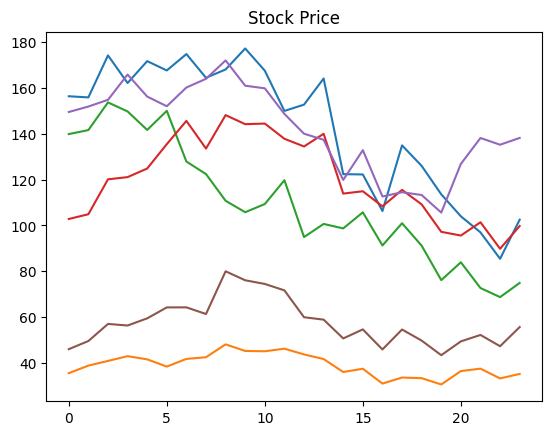

In [74]:
import matplotlib.pyplot as plt
i = 0
# if True:
for i in range(len(data_pd)):
    plt.plot(time_pd,data_pd[i], '-',label=stocks[i])
    plt.title("Stock Price")

In [75]:
## Exponential distribution
# f(x) = lambda * exp ^{ -lambda * x} for x >= 0
# f(x) = 0 for x < 0
def monoExp(x, lambd, t, b):
    return lambd * np.exp(-t * x) + b


In [86]:
ys = np.array(data_pd)
type(ys[0])

numpy.ndarray

In [93]:
import scipy
xs = np.transpose(np.array(range(24))+1)
# p0 = (2000, .1, 50) # start with values near those we expect
ys = np.asarray(data_pd)
params, cv = scipy.optimize.curve_fit(monoExp, (xs), ys[5])#, p0)
m, t, b = params


/tmp/ipykernel_78/97073324.py:5: RuntimeWarning: overflow encountered in exp
  return lambd * np.exp(-t * x) + b
